***Kmeans***

# **Project_Part 2: Business Data modeling Project (15 %)**

In [ ]:
# 6531501058 Thawatchai Duangmala

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs

# Load the dataset
df = pd.read_csv("/content/Mall_Customers.csv")

# Check the data
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


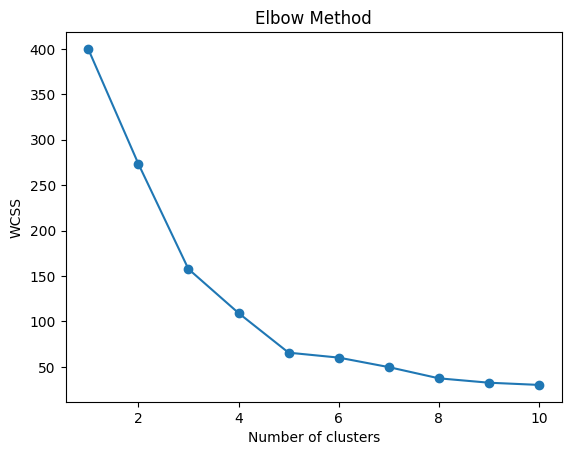

In [ ]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Normalize the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


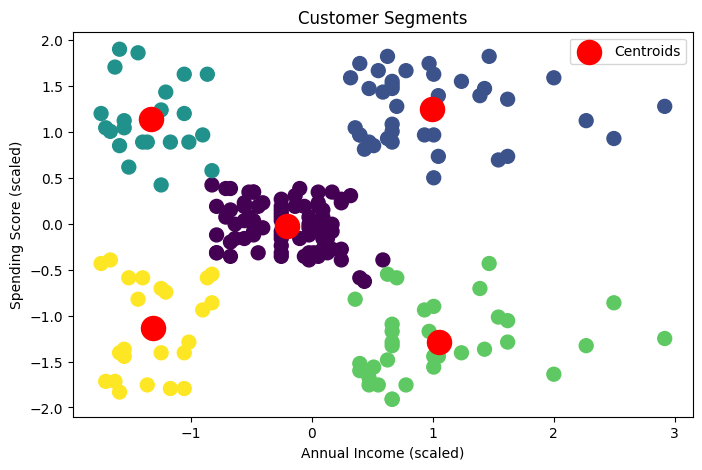

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red' , label='Centroids')
plt.title("Customer Segments")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

In [ ]:
import pickle
#save the trained model into .pkl
filename = 'kmeans_model.pkl'
pickle.dump(kmeans, open(filename, 'wb'))

#load the saved model
loaded_model = pickle.load(open('kmeans_model.pkl', 'rb'))